In [189]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,mean_squared_error,r2_score
from sklearn import metrics



In [2]:
data = pd.read_csv('customer_churn.csv')

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [5]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
data.shape

(7043, 21)

In [8]:
data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [9]:
customer_5 = pd.DataFrame(data['Dependents'])
customer_5.head()

,Dependents
0,No
1,No
2,No
3,No
4,No


In [37]:
customer_15 = pd.DataFrame(data.iloc[:,14])
customer_15.head()

,StreamingMovies
0,No
1,No
2,No
3,No
4,No


In [11]:
data['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [12]:
data['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [38]:
senior_male_electronic = data[(data['PaymentMethod']=='Electronic check')&(data["gender"]=='Male')&(data['SeniorCitizen']==1)]  
senior_male_electronic.shape



(298, 21)

In [39]:
senior_male_electronic.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
55,1658-BYGOY,Male,1,No,No,18,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.45,1752.55,Yes
57,5067-XJQFU,Male,1,Yes,Yes,66,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,108.45,7076.35,No
78,0191-ZHSKZ,Male,1,No,No,30,Yes,No,DSL,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,74.75,2111.3,No
91,2424-WVHPL,Male,1,No,No,1,Yes,No,Fiber optic,No,...,No,Yes,No,No,Month-to-month,No,Electronic check,74.70,74.7,No


In [15]:
customer_total_tenure = data[(data['tenure'] > 70 ) | (data['MonthlyCharges']>100)]
customer_total_tenure.shape

(1259, 21)

In [16]:
customer_total_tenure.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
12,8091-TTVAX,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.1,No
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes
14,5129-JLPIS,Male,0,No,No,25,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,105.50,2686.05,No
15,3655-SNQYZ,Female,0,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.25,7895.15,No


In [44]:
two_mail_yes = data[(data['Contract']=='Two year')&(data['PaymentMethod']=='Mailed check')&(data['Churn']=='Yes')&(data['Churn']=='Yes')]
two_mail_yes.shape

(3, 21)

In [45]:
two_mail_yes.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
268,6323-AYBRX,Male,0,No,No,59,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,1099.6,Yes
5947,7951-QKZPL,Female,0,Yes,Yes,33,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,24.50,740.3,Yes
6680,9412-ARGBX,Female,0,No,Yes,48,Yes,No,Fiber optic,No,...,Yes,Yes,Yes,No,Two year,Yes,Mailed check,95.50,4627.85,Yes


In [48]:
customer_333=data.sample(n=333)
customer_333

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5258,8634-CILSZ,Male,0,No,No,69,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),104.70,7220.35,Yes
4945,1223-UNPKS,Male,0,Yes,Yes,20,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.05,400,No
4214,4228-ZGYUW,Male,0,No,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,90.05,368.1,Yes
3861,0479-HMSWA,Female,0,No,Yes,26,Yes,No,Fiber optic,No,...,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,105.45,2715.3,No
1116,8461-EFQYM,Female,0,No,No,38,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Electronic check,24.25,914.4,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4218,9027-YFHQJ,Male,0,No,No,7,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic),25.05,152.95,No
5006,9103-TCIHJ,Female,0,No,No,15,Yes,Yes,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,55.70,899.8,Yes
3046,8715-KKTFG,Female,0,Yes,No,61,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),103.30,6518.35,No
814,4785-NKHCX,Male,1,No,No,5,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),20.05,94.15,No


In [20]:
data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [21]:
data['InternetService'].value_counts().keys()

Index(['Fiber optic', 'DSL', 'No'], dtype='object')

In [22]:
data['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

C:\Users\janesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


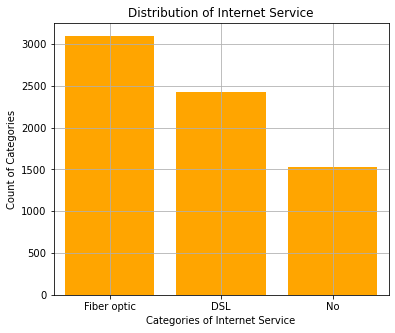

In [32]:
fig = plt.figure(figsize = (6,5))
sns.barplot(data['InternetService'].value_counts().keys().tolist(),data['InternetService'].value_counts().tolist(),color = 'orange',saturation=1.0,linewidth = 0.9)
plt.xlabel("Categories of Internet Service")
plt.ylabel("Count of Categories")
plt.title("Distribution of Internet Service")
plt.grid()
plt.show()

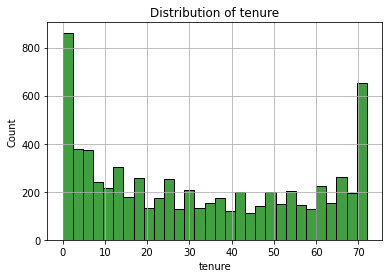

In [36]:
sns.histplot(data['tenure'],bins =30,color = 'green')
plt.title('Distribution of tenure')
plt.grid()

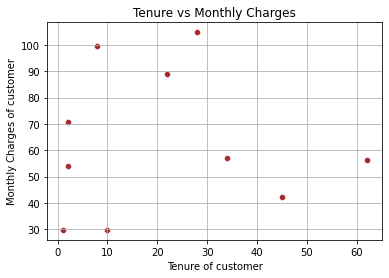

In [80]:
sns.scatterplot(x = data['tenure'].head(10) , y = data['MonthlyCharges'].head(10),data=data,color = 'brown')
plt.xlabel('Tenure of customer')
plt.ylabel('Monthly Charges of customer')
plt.title('Tenure vs Monthly Charges')
plt.grid()

(array([0, 1, 2]),
 [Text(0, 0, 'Month-to-month'),
  Text(1, 0, 'One year'),
  Text(2, 0, 'Two year')])

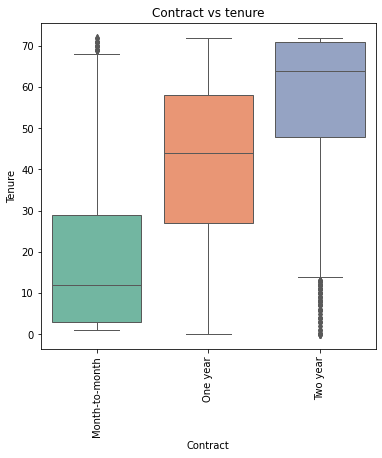

In [31]:
fig = plt.figure(figsize = (6,6))
sns.boxplot(x = data['Contract'], y = data['tenure'],data = data,palette="Set2",linewidth=1.0)
plt.title('Contract vs tenure')
plt.xlabel('Contract')
plt.ylabel('Tenure')
plt.xticks(rotation = 90)

In [219]:
X = pd.DataFrame(data['tenure'])
y = pd.DataFrame(data['MonthlyCharges'])

In [220]:
x_train,x_test,y_train,y_test = train_test_split(X , y ,test_size = 0.3 , random_state = 100)

In [221]:
lr = LinearRegression()
lr

LinearRegression()

In [222]:
lr.fit(x_train,y_train)
pred_y = lr.predict(x_test)
pred_y 

array([[69.99627416],
       [76.83517643],
       [74.03744369],
       ...,
       [55.07503285],
       [62.22479431],
       [76.52431724]])

In [223]:
print(lr.intercept_)

[54.45331446]


In [224]:
print(lr.coef_)

[[0.31085919]]


In [225]:
print(r2_score(y_test,pred_y))

0.054644483849898506


In [226]:
error = mean_squared_error(y_test,pred_y)
error

841.7175925523252

In [139]:
print("Mean ",(metrics.mean_absolute_error(y_test,pred_y)))
print("Mean Absolute Error",metrics.mean_squared_error(y_test,pred_y))
print("Mean Squared Error",np.sqrt(metrics.mean_squared_error(y_test,pred_y)))

Mean  25.09890142669942
Mean Absolute Error 841.7175925523252
Mean Squared Error 29.01236964731294


In [117]:
print('Accuracy',lr.score(x_test,pred_y))

Accuracy 1.0


In [237]:
X = pd.DataFrame(data['MonthlyCharges'])
y = pd.DataFrame(data['Churn'])

In [238]:
x_train,x_test,y_train,y_test = train_test_split(X , y ,test_size = 0.35 , random_state = 0)

In [239]:
lg = LogisticRegression()
lg

LogisticRegression()

In [240]:
lg.fit(x_train,y_train)
pred_y1 = lg.predict(x_test)
pred_y1

C:\Users\janesh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [241]:
print(classification_report(y_test,pred_y1))

C:\Users\janesh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\janesh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

          No       0.74      1.00      0.85      1815
         Yes       0.00      0.00      0.00       651

    accuracy                           0.74      2466
   macro avg       0.37      0.50      0.42      2466
weighted avg       0.54      0.74      0.62      2466



C:\Users\janesh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [242]:
print(confusion_matrix(pred_y1,y_test))

[[1815  651]
 [   0    0]]


In [243]:
1813/(1813+653)

0.735198702351987

In [244]:
score = accuracy_score(y_test,pred_y1)

In [245]:
score

0.7360097323600974

In [208]:
X = pd.DataFrame(data.iloc[:,[5,18]])
y = pd.DataFrame(data['Churn'])

In [209]:
X.head()

,tenure,MonthlyCharges
0,1,29.85
1,34,56.95
2,2,53.85
3,45,42.30
4,2,70.70


In [210]:
x_train,x_test,y_train,y_test = train_test_split(X , y ,test_size = 0.20 , random_state = 101)

In [211]:
lg1 = LogisticRegression()
lg1

LogisticRegression()

In [212]:
lg1.fit(x_test,y_test)
pred_y2=lg1.predict(x_test)
pred_y2

C:\Users\janesh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [213]:
print(classification_report(y_test,pred_y2))

              precision    recall  f1-score   support

          No       0.81      0.90      0.85      1026
         Yes       0.62      0.43      0.51       383

    accuracy                           0.78      1409
   macro avg       0.72      0.67      0.68      1409
weighted avg       0.76      0.78      0.76      1409



In [214]:
print(confusion_matrix(y_test,pred_y2))

[[927  99]
 [218 165]]


In [215]:
score = accuracy_score(y_test,pred_y2)

In [216]:
score

0.7750177430801988

In [217]:
(927+165)/(927+99+218+165)

0.7750177430801988

In [252]:
X = pd.DataFrame(data['tenure'])
y = pd.DataFrame(data['Churn'])

In [253]:
x_train,x_test,y_train,y_test = train_test_split(X , y ,test_size = 0.20 , random_state = 1)

In [254]:
dt = DecisionTreeClassifier()
dt

DecisionTreeClassifier()

In [255]:
dt.fit(x_train,y_train)
pred_y3 = dt.predict(x_test)
pred_y3

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [256]:
print(confusion_matrix(y_test,pred_y3))

[[983  78]
 [254  94]]


In [261]:
(983+94)/(983+78+254+94)

0.7643718949609652

In [258]:
print(classification_report(y_test,pred_y3))

              precision    recall  f1-score   support

          No       0.79      0.93      0.86      1061
         Yes       0.55      0.27      0.36       348

    accuracy                           0.76      1409
   macro avg       0.67      0.60      0.61      1409
weighted avg       0.73      0.76      0.73      1409



In [259]:
score = accuracy_score(y_test,pred_y3)

In [260]:
score

0.7643718949609652

In [271]:
X = pd.DataFrame(data.loc[:,['tenure','MonthlyCharges']])
y = pd.DataFrame(data['Churn'])

In [272]:
x_train,x_test,y_train,y_test = train_test_split(X , y ,test_size = 0.30 , random_state = 0)

In [273]:
rf = RandomForestClassifier()
rf

RandomForestClassifier()

In [269]:
rf.fit(x_train,y_train)
pred_y4 = rf.predict(x_test)
pred_y4

C:\Users\janesh\AppData\Local\Temp\ipykernel_16632\2565502940.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [274]:
print(classification_report(y_test,pred_y4))

              precision    recall  f1-score   support

          No       0.80      0.86      0.83      1560
         Yes       0.51      0.41      0.45       553

    accuracy                           0.74      2113
   macro avg       0.66      0.63      0.64      2113
weighted avg       0.73      0.74      0.73      2113



In [275]:
print(confusion_matrix(y_test,pred_y4))

[[1343  217]
 [ 327  226]]


In [276]:
(1343+226)/(1343+217+327+226)

0.7425461429247515

In [277]:
score=accuracy_score(y_test,pred_y4)

In [278]:
score

0.7425461429247515